In [10]:

#************************************************
# Data Preprocessing
#************************************************

# Load your dataset
df = pd.read_csv('/Users/anantsharma/Desktop/Projects/Crop Recommedation Webapp/Crop-Recommendation-Model-main/DataSet/crop_dataset.csv')
# Removes the First serial number row
df.drop(columns=['Unnamed: 0'], inplace=True)


# Prepare data
X = df.drop(columns=['label'])
y = df['label']

#Encode Crop Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize the Feature Values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

#************************************************
# As of Now 
# Our your data is:
# Cleaned
# Encoded
# Scaled (Normalized)
# Split into train and test sets
#************************************************




Test Accuracy: 0.9944061962134251
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       599
      banana       1.00      1.00      1.00       659
   blackgram       0.99      0.99      0.99       624
    chickpea       1.00      1.00      1.00       638
     coconut       1.00      1.00      1.00       640
      coffee       1.00      1.00      1.00       634
      cotton       1.00      1.00      1.00       628
      grapes       1.00      1.00      1.00       644
        jute       0.94      0.98      0.96       662
 kidneybeans       0.99      1.00      1.00       625
      lentil       0.98      0.99      0.98       621
       maize       1.00      1.00      1.00       611
       mango       1.00      1.00      1.00       638
   mothbeans       1.00      0.99      0.99       623
    mungbean       1.00      1.00      1.00       640
   muskmelon       1.00      1.00      1.00       622
      orange       1.00      1.00      1.00    

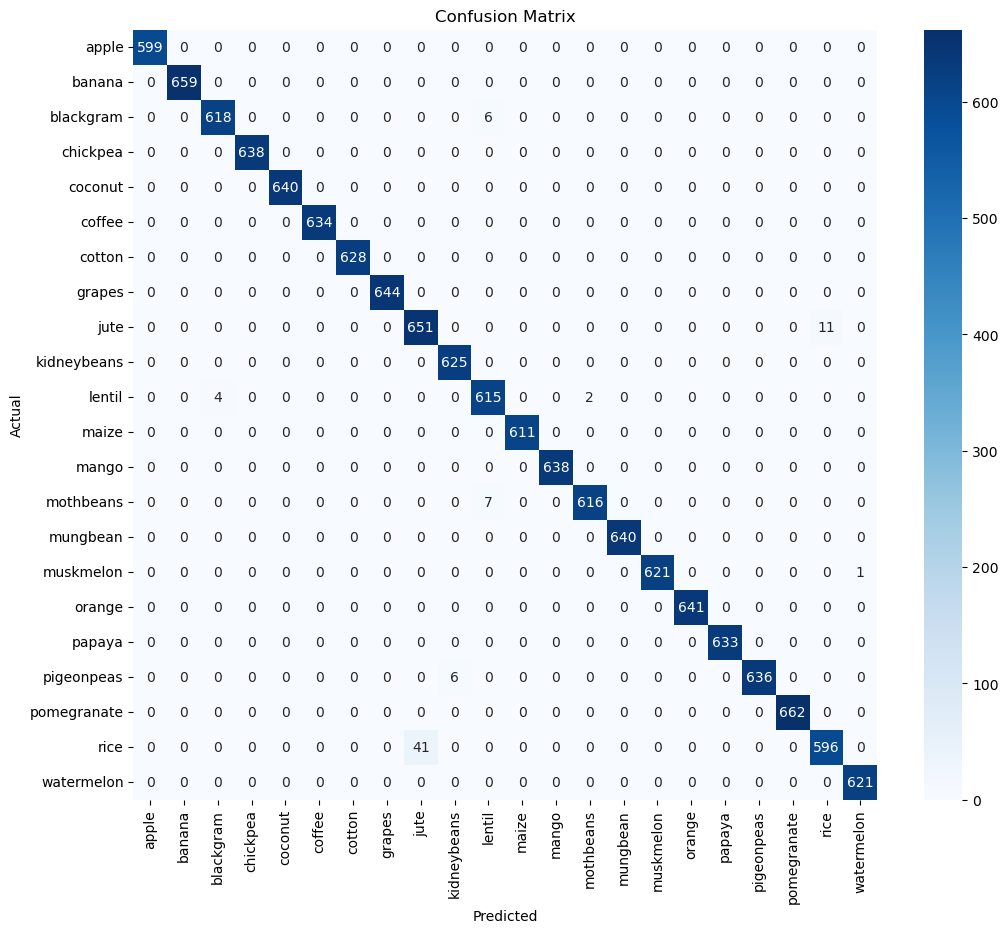

In [2]:
# -------------------------------
# Import libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Load and clean the dataset
# -------------------------------
df = pd.read_csv('/Users/anantsharma/Desktop/Projects/Crop Recommedation Webapp/Crop-Recommendation-Model-main/DataSet/crop_dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

# -------------------------------
# Encode features and labels
# -------------------------------
X = df.drop(columns=['label'])
y = df['label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# -------------------------------
# Train MLP Classifier
# -------------------------------
mlpClassifier = MLPClassifier(
    hidden_layer_sizes=200,
    activation='relu',
    batch_size=5000,
    random_state=0,
    tol=0.0005,
    max_iter=500
)

mlpClassifier.fit(X_train, y_train)

# -------------------------------
# Evaluate the model
# -------------------------------
y_pred = mlpClassifier.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

# -------------------------------
# Confusion matrix visualization
# -------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
import joblib
import os

# Step 1: Ensure the folder exists (safe in case it was deleted again)
model_path = '/Users/anantsharma/Desktop/Projects/Crop Recommedation Webapp/Crop-Recommendation-Model-main/Model'
os.makedirs(model_path, exist_ok=True)

# Step 2: Save the trained MLP model
joblib.dump(mlpClassifier, f'{model_path}/crop_recommendation_model.pkl')

# Step 3: Save the LabelEncoder (used for decoding predictions)
joblib.dump(le, f'{model_path}/label_encoder.pkl')

# Step 4: Save the scaler (used for input normalization)
joblib.dump(scaler, f'{model_path}/scaler.pkl')

print("✅ All files saved successfully!")


✅ All files saved successfully!


In [4]:
import joblib

model = joblib.load("Model/crop_recommendation_model.pkl")
encoder = joblib.load("Model/label_encoder.pkl")
scaler = joblib.load("Model/scaler.pkl")

print("✅ Model, encoder, and scaler loaded successfully!")


✅ Model, encoder, and scaler loaded successfully!
